# Prototype Visuals

## Other Data Leads
### Found via WokeWindows
- [Paid Detail Datasets](https://www.muckrock.com/foi/boston-3/2019-paid-detail-cards-95919/)
- [Traffic Citations](https://github.com/nstory/boston_pd_citations) 
- [State and Local Payroll](https://data.census.gov/cedsci/table?t=Local%20Government%20Finances%3AState%20Government%20Finances%3AState%20and%20Local%20Government%20Finances&tid=GOVSTIMESERIES.GS00EP01)
- [State and Local Finances](https://www.census.gov/programs-surveys/cog.html)

## Acquisition pre-req

In [3]:
import requests
#parameters: none
#returns: a dictionary, with plaintext keys corresponding to the resource ID
#notes: the resource ID is data.boston.gov 's internal identifier for datasets
def getSourceDict():
    sources = {"CRIMEINCIDENTREPORTS_2022": "313e56df-6d77-49d2-9c49-ee411f10cf58",
                "CRIMEINCIDENTREPORTS_2021": "f4495ee9-c42c-4019-82c1-d067f07e45d2",
                "CRIMEINCIDENTREPORTS_2020": "be047094-85fe-4104-a480-4fa3d03f9623",
                "CRIMEINCIDENTREPORTS_2019": "34e0ae6b-8c94-4998-ae9e-1b51551fe9ba",
                "CRIMEINCIDENTREPORTS_2018": "e86f8e38-a23c-4c1a-8455-c8f94210a8f1",
                "SHOOTINGS": "313e56df-6d77-49d2-9c49-ee411f10cf58",
                "SHOTSFIRED": "e16705ca-49ce-4803-84c1-c9848aa63024",
                "FIELDINTERROGATION_2020": "64dd32d9-26f9-4275-9265-97fa3de7e22b",
                "FIELDINTERROGATION_2019": "03f33240-47c1-46f2-87ae-bcdabec092ad",
                "FIELDINTERROGATION_2016": "35f3fb8f-4a01-4242-9758-f664e7ead125",
                "FIREARM_RECOVERY": "a3d2260f-8a41-4e95-9134-d14711b0f954",
                "EARNINGS_2021": "ec5aaf93-1509-4641-9310-28e62e028457",
                "EARNINGS_2020": "e2e2c23a-6fc7-4456-8751-5321d8aa869b",
                "EARNINGS_2019": "3bdfe6dc-3a81-49ce-accc-22161e2f7e74",
                "EARNINGS_2018": "31358fd1-849a-48e0-8285-e813f6efbdf1",
                "EARNINGS_2017": "70129b87-bd4e-49bb-aa09-77644da73503",
                "EARNINGS_2016": "8368bd3d-3633-4927-8355-2a2f9811ab4f",
                "EARNINGS_2015": "2ff6343f-850d-46e7-98d1-aca79b619fd6",
                "EARNINGS_2014": "941c9de4-fb91-41bb-ad5a-43a35f5dc80f",
                "EARNINGS_2013": "fac6a421-72fb-4f85-b4ac-4aca1e32d94e",
                "EARNINGS_2012": "d96dd8ad-9396-484a-87af-4d15e9e2ccb2",
                "EARNINGS_2011": "a861eff8-facc-4372-9b2d-262c2887b19e",
                "CHECKBOOK_2022": "0a261d4e-3eec-4bac-bf72-b9a7aa77b033",
                "CHECKBOOK_2021": "32897eeb-d9ca-494f-93b1-991c50bcd6a6",
                "CHECKBOOK_2020": "c093700f-d78a-49de-a8fe-508ba834ff6f",
                "CHECKBOOK_2019": "38227f56-46ed-47fe-9e1c-5d2fce52908d",
                "CHECKBOOK_2018": "5d8e373f-29a0-472c-b39b-9aa249e86fd5",
                "CHECKBOOK_2017": "01a5c35c-19e3-419e-a8b5-cb623525b96d",
                "CHECKBOOK_2016": "ae5a15cc-8bd3-455d-8cbb-9221e07c1426",
                "CHECKBOOK_2015": "5714ab9f-52d3-4c41-b2a6-2700b41438fc",
                "CHECKBOOK_2014": "69eab395-07d3-41b8-a021-a0d314bd8046",
                "CHECKBOOK_2013": "c2bc5615-9478-4a9b-b71c-f63f6364e409",
                "CHECKBOOK_2012": "fd5c56a7-224f-41c4-a011-969b8aee457d"
                }
    return(sources)

#parameters: the plaintext name of the source you'd like to get the resource ID for
#returns: a string with the resource ID corresponding to your parameter
def sourcetorid(sourcename):
    rid = getSourceDict()[sourcename]
    return(rid)
#parameters: none
#returns: a list of all selectable sources in the source dictionary
def list_sources():
    sourcelist=[]
    q = getSourceDict()
    for key in q:
        sourcelist.append(key)
    return(sourcelist)
#parameters: the resource id, and an integer; n
#returns: the response from the database at resource id rid, including only the first n entries
#notes: resource id, int n -> json (results which are the first n)
def n_recent(rid, n):
    r = requests.get("https://data.boston.gov/api/3/action/datastore_search?resource_id="+rid+"&limit="+str(n))
    return(r.json())

#parameters: the resource id, and a string; n
#returns: the response from the database at resource id rid, including only the entries which contain string n
#notes: resource id, string n -> json (results which are those which contain n)
def n_contained(rid, n):
    r = requests.get("https://data.boston.gov/api/3/action/datastore_search?resource_id="+rid+"&q="+str(n))
    return(r.json())

#parameters: the resource id, an integer; and an integer; n
#returns: the response from the database at resource id rid, including only r entries after index n
#notes: resource id, int r (the number of results to return), int n (the starting index) -> json (results which start at n, go to n+r)
def n_skip(rid, r, n):
    r = requests.get("https://data.boston.gov/api/3/action/datastore_search?resource_id="+rid+"$top=",r,"&$skip=",n)
    return(r.json())
#parameters: a json returned by a request function such as n_recent, n_contained, and n_skip
#returns: the field names of the same json
#notes: request json -> list of fields in the result w/ types and names
def return_fields(returnedjson):
    return(returnedjson['result']['fields'])

#parameters: a json returned by a request function such as n_recent, n_contained, and n_skip
#returns: the same json, stripped of metadata
#notes: request result -> nice format to parse
def eat_result(eson):
    re = eson['result']['records']
    return(re)


## Earnings Acquisition Setup

In [3]:
#selecting the plaintext names of our desired database
sourcenames = list_sources()
available_earnings = []

for x in range(0, len(sourcenames)):
    if(sourcenames[x].split("_")[0]=="EARNINGS"):
        available_earnings.append(sourcenames[x])

earnings_rids = []
for x in range(0, len(available_earnings)):
    earnings_rids.append(sourcetorid(available_earnings[x]))

earnings_fields = []
for x in range(0, len(earnings_rids)):
    #print(n_recent(earnings_rids[x], 1))
    earnings_fields.append(return_fields(n_recent(earnings_rids[x], 1)))


## Earnings Data Formatting

In [4]:
for x in range(0, len(earnings_fields)):
    print("======== "+ available_earnings[x])
    print("-- RID: " + earnings_rids[x])
    print("-- FIELDS: " + str(len(earnings_fields[x])))
    for y in range(0, len(earnings_fields[x])):
        print("--- " +str(earnings_fields[x][y]))
    


======== EARNINGS_2021
-- RID: ec5aaf93-1509-4641-9310-28e62e028457
-- FIELDS: 13
--- {'type': 'int', 'id': '_id'}
--- {'type': 'text', 'id': 'NAME'}
--- {'type': 'text', 'id': 'DEPARTMENT_NAME'}
--- {'type': 'text', 'id': 'TITLE'}
--- {'type': 'text', 'id': 'REGULAR'}
--- {'type': 'text', 'id': 'RETRO'}
--- {'type': 'text', 'id': 'OTHER'}
--- {'type': 'text', 'id': 'OVERTIME'}
--- {'type': 'text', 'id': 'INJURED'}
--- {'type': 'text', 'id': 'DETAIL'}
--- {'type': 'text', 'id': 'QUINN_EDUCATION_INCENTIVE'}
--- {'type': 'text', 'id': 'TOTAL_GROSS'}
--- {'type': 'text', 'id': 'POSTAL'}
======== EARNINGS_2020
-- RID: e2e2c23a-6fc7-4456-8751-5321d8aa869b
-- FIELDS: 13
--- {'type': 'int', 'id': '_id'}
--- {'type': 'text', 'id': 'NAME'}
--- {'type': 'text', 'id': 'DEPARTMENT_NAME'}
--- {'type': 'text', 'id': 'TITLE'}
--- {'type': 'text', 'id': 'REGULAR'}
--- {'type': 'text', 'id': 'RETRO'}
--- {'type': 'text', 'id': 'OTHER'}
--- {'type': 'text', 'id': 'OVERTIME'}
--- {'type': 'text', 'id': '

## Earnings Requests

In [5]:
earnings_data = []
for x in range(0, len(earnings_rids)):
    earnings_data.append(eat_result(n_recent(earnings_rids[x], 1000000000)))

## Earnings Names

In [6]:
import pandas as pd
years = {}

find_list = ["department", "name", "title", "regular", "overtime", "detail", "retro", "injured", "quinn", "other","total"]

dictionaries = []
#our_dataframe = pd.DataFrame(data=our_array, columns=columns)

for item in range(0, len(earnings_data)):
   
    year = available_earnings[item].split("_")[1]   
    for entry in range(0, len(earnings_data[item])):
        current_entry = earnings_data[item][entry]
        parsed_dict = {}
        
        for key in current_entry:
            kv = "key"
            for x in range(0,len(find_list)):
                if(find_list[x] in key.lower()):
                    if(x==1 and "department" not in key.lower()):
                        kv = "name"
                    elif(x==1 and "department" in key.lower()):
                        kv = "department"
                    else:
                        kv = find_list[x]
                parsed_dict[kv] = str(current_entry[key]).replace(",","").replace("-","0").replace("$","").replace("None","0")
        parsed_dict["year"] = year
        dictionaries.append(parsed_dict)

print(len(dictionaries))



243871


In [7]:
our_dataframe = pd.DataFrame(data=dictionaries,columns=["year"]+find_list)
print(our_dataframe.head())

   year                department                  name  \
0  2021  Boston Police Department        BeckersRichard   
1  2021  Boston Police Department  McGowanJacqueline M.   
2  2021  Boston Police Department         HarrisShawn N   
3  2021  Boston Police Department      WashingtonWalter   
4  2021  Boston Police Department      Mosley Jr.Curtis   

                           title    regular  overtime    detail retro  \
0                 Police Officer          0         0         0     0   
1                 Police Officer          0         0         0     0   
2  Police Offc Comm Serv Offc 38   69772.10  82300.87  12144.00     0   
3                 Police Officer  100963.38  67849.66   9016.00     0   
4  Police Offc Comm Serv Offc 38  109858.02  75938.65  19550.00     0   

    injured     quinn       other       total  
0         0         0  1264843.63  1264843.63  
1         0         0  1252990.81  1252990.81  
2  30939.24  25178.06   212739.48   433073.75  
3         0  1

## Breaking Down (X: Time, Y: Total, Color: Department)


In [16]:
from IPython.display import clear_output, display
import time
x_axis = our_dataframe["year"]
y_axis = our_dataframe["injured"]
departments = our_dataframe["department"]
assert len(x_axis)==len(y_axis)
assert len(x_axis)==len(departments)
assert len(y_axis)==len(departments)

points = []
indexed = min([len(departments), len(y_axis), len(x_axis)])
print(indexed)
#print("/r")
for z in range(0, indexed):
    #clear_output(wait=True)
    #print(str((z / indexed)*100)+"% "+'\n'+ str(z)+" of " + str(indexed))
    #time.sleep(0.0001)
    if(str(x_axis[z]).replace(".","").isnumeric()):
        x_axis[z] = int(x_axis[z])
    else:
        x_axis[z] = None
        
    if(str(y_axis[z]).replace(".","").isnumeric()):
        y_axis[z] = float(y_axis[z])
    else:
        x_axis[z] = None
    
    
    points.append([x_axis[z], y_axis[z], departments[z]])
    
clear_output(wait=False)
our_cleaned_dataframe = pd.DataFrame(data=points,columns=["year", "total", "department"])
print(our_cleaned_dataframe.head())


     year     total                department
0  2021.0       0.0  Boston Police Department
1  2021.0       0.0  Boston Police Department
2  2021.0  30939.24  Boston Police Department
3  2021.0       0.0  Boston Police Department
4  2021.0       0.0  Boston Police Department


### Plotting

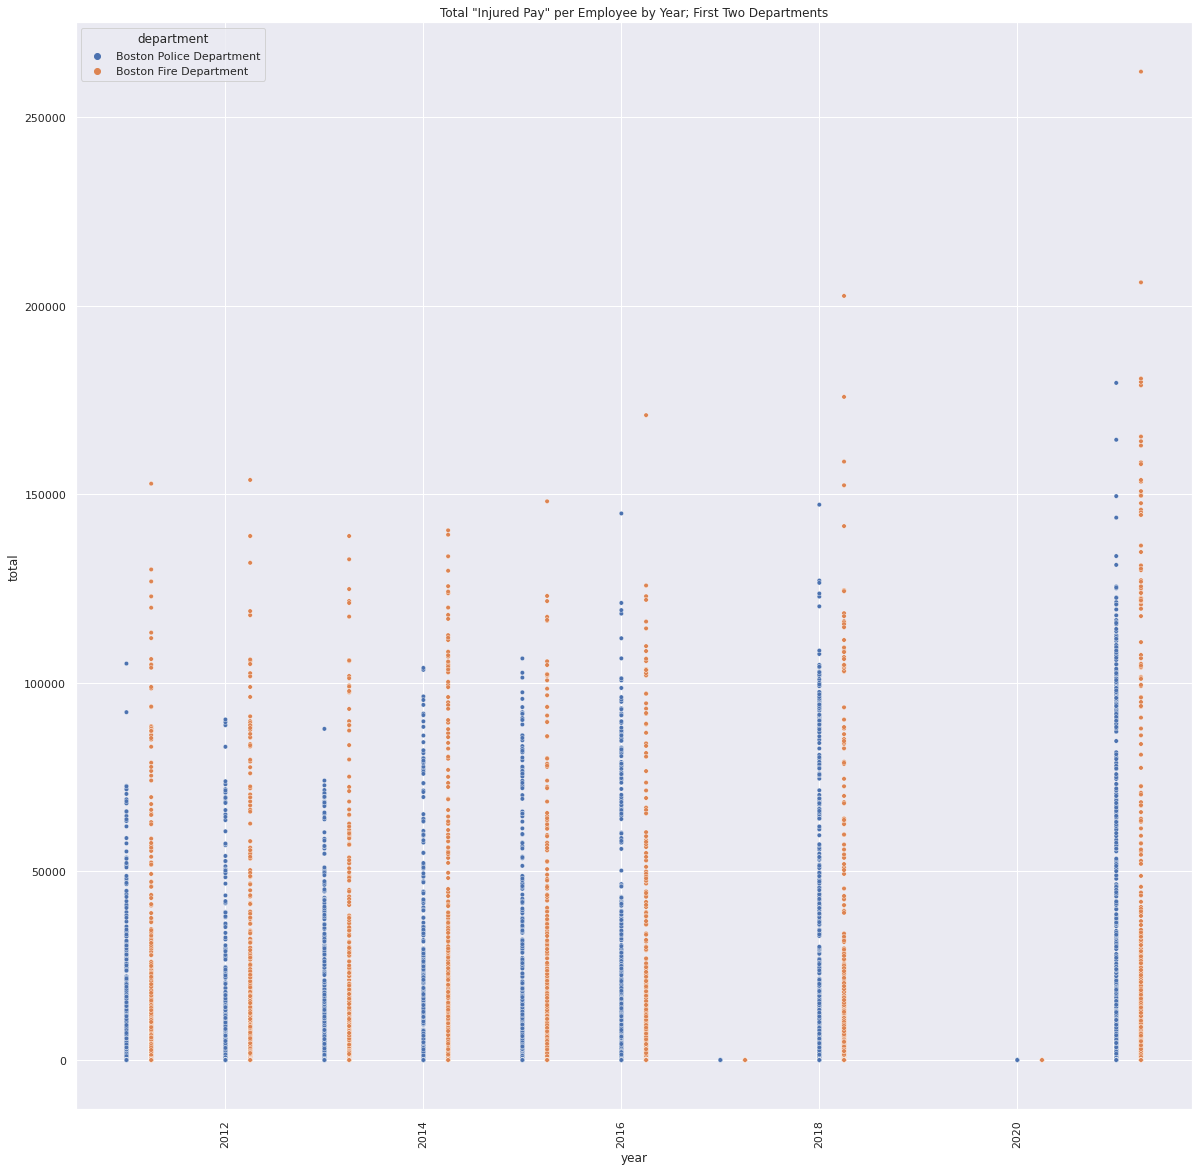

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
options = ["Boston Police Department", "Boston Fire Department"]
filtered_df = our_cleaned_dataframe[our_cleaned_dataframe['department'].isin(options)]
filtered_df.loc[our_cleaned_dataframe['department'].isin(["Boston Fire Department"]), "year"]+=0.25
sns.set(rc = {'figure.figsize':(20,20)})
sns.set(font_scale = 60)
sns.set_context("notebook")

sc = sns.scatterplot(data=filtered_df, x="year", y="total", hue="department", legend = True, s=20)
sc.invert_yaxis()
sc.set(title='Total "Injured Pay" per Employee by Year; First Two Departments')
plt.show()

## ----

## ----

## Breaking Down Checkbook


## Acquiring

### Available Datasets; RID & Fields

In [39]:
#selecting the plaintext names of our desired database
import pandas as pd
sourcenames = list_sources()
available_checkbook_rid = []
data_meta_data = {}
data_data = {}
for x in range(0, len(sourcenames)):
    if(sourcenames[x].split("_")[0]=="CHECKBOOK"):
        thisrid = sourcetorid(sourcenames[x])
        thisfields = return_fields(n_recent(thisrid, 1))
        thiscolumns = []
        data_meta_data[sourcenames[x]]={"rid": thisrid, "fields": thisfields}
        for y in range(0, len(thisfields)):
            thiscolumns.append(thisfields[y]["id"])
        this_dataframe = pd.DataFrame(columns=thiscolumns)
        data_data[sourcenames[x]]=this_dataframe
    
for key in data_meta_data:
    print("################# ", key)
    for key2 in data_meta_data[key]:
        print(key2, " :")
        print(data_meta_data[key][key2])
        
        

#################  CHECKBOOK_2022
rid  :
0a261d4e-3eec-4bac-bf72-b9a7aa77b033
fields  :
[{'type': 'int', 'id': '_id'}, {'type': 'text', 'id': 'Voucher'}, {'type': 'text', 'id': 'Voucher_Line'}, {'type': 'text', 'id': 'Distribution_Line'}, {'type': 'text', 'id': 'Entered'}, {'type': 'text', 'id': 'Month_Number'}, {'type': 'text', 'id': 'Fiscal_Month'}, {'type': 'text', 'id': 'Month'}, {'type': 'text', 'id': 'Fiscal_Year'}, {'type': 'text', 'id': 'Year'}, {'type': 'text', 'id': 'Vendor_Name'}, {'type': 'text', 'id': 'Account'}, {'type': 'text', 'id': 'Account_Descr'}, {'type': 'text', 'id': 'Dept'}, {'type': 'text', 'id': 'Dept_Name'}, {'type': 'text', 'id': 'c6_Digit_Org_Name'}, {'type': 'text', 'id': 'Monetary_Amount'}]
#################  CHECKBOOK_2021
rid  :
32897eeb-d9ca-494f-93b1-991c50bcd6a6
fields  :
[{'type': 'int', 'id': '_id'}, {'type': 'text', 'id': 'Voucher'}, {'type': 'text', 'id': 'Voucher_Line'}, {'type': 'text', 'id': 'Distribution_Line'}, {'type': 'text', 'id': 'Entered

### Pulling all of it from data.boston.gov

In [ ]:
for key in data_data:
    print("=== requesting ", key)
    incoming = eat_result(n_recent(data_meta_data[key]['rid'], 1000000000))
    print("=== request completed; ", str(len(incoming)),' entries from ', key)
    print("=== parsing entries into dataframe")
    for x in range(0, len(incoming)):
         data_data[key] = data_data[key].append(incoming[x],ignore_index = True)
    print("=== parsing complete...")
    print(" ")
    print(data_data[key].head())
    print(" ")

=== requesting  CHECKBOOK_2022
=== request completed;  32000  entries from  CHECKBOOK_2022
=== parsing entries into dataframe
